# Notebook to read a dataset and do basic field statistics and distributions

Note that if you want to make distributions for a DQR you will need to modify this notebook, in particular 
make a custom picture for each field that uses good choices of ranges and log scale.

In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
start_time = dt.datetime.now()
print('LOAD DURATION: ', dt.datetime.now() - start_time)

LOAD DURATION:  0:00:00.000023


In [2]:
# if you want to see all the library versions loaded:
# %pip list

In [3]:
%%time
data = pd.read_csv('card transactions.csv')

CPU times: user 54.9 ms, sys: 12 ms, total: 66.9 ms
Wall time: 67.7 ms


In [4]:
data.dropna(how='all', axis=1, inplace=True) # drop any empty columns
print('data.shape=',data.shape)
print(data.info())
data.head().transpose()

data.shape= (97852, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97852 entries, 0 to 97851
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             97852 non-null  int64  
 1   Cardnum            97852 non-null  int64  
 2   Date               97852 non-null  object 
 3   Merchnum           94455 non-null  object 
 4   Merch description  97852 non-null  object 
 5   Merch state        96649 non-null  object 
 6   Merch zip          93149 non-null  float64
 7   Transtype          97852 non-null  object 
 8   Amount             97852 non-null  float64
 9   Fraud              97852 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 7.5+ MB
None


,0,1,2,3,4
Recnum,1,2,3,4,5
Cardnum,5142190439,5142183973,5142131721,5142148452,5142190439
Date,1/1/10,1/1/10,1/1/10,1/1/10,1/1/10
Merchnum,5509006296254,61003026333,4503082993600,5509006296254,5509006296254
Merch description,FEDEX SHP 12/23/09 AB#,SERVICE MERCHANDISE #81,OFFICE DEPOT #191,FEDEX SHP 12/28/09 AB#,FEDEX SHP 12/23/09 AB#
Merch state,TN,MA,MD,TN,TN
Merch zip,38118.0,1803.0,20706.0,38118.0,38118.0
Transtype,P,P,P,P,P
Amount,3.62,31.42,178.49,3.62,3.62
Fraud,0,0,0,0,0


In [5]:
data.tail().transpose()

,97847,97848,97849,97850,97851
Recnum,97848,97849,97850,97851,97852
Cardnum,5142276053,5142225701,5142226486,5142244619,5142243247
Date,12/31/10,12/31/10,12/31/10,12/31/10,12/31/10
Merchnum,3500000006160,8090710030950,4503057341100,8834000695412,9108347680006
Merch description,BEST BUY 00001610,MARKUS OFFICE SUPPLIES,"TECH PAC, INC",BUY.COM,STAPLES NATIONAL #471
Merch state,KY,OH,OH,CA,NJ
Merch zip,41042.0,45248.0,45150.0,92656.0,7606.0
Transtype,P,P,P,P,P
Amount,84.79,118.75,363.56,2202.03,554.64
Fraud,0,0,0,0,0


In [6]:
# add a dummy categorical column for the case the fields all look numeric
data['dummy'] = 'temp'

In [7]:
df_stats = pd.DataFrame(data.count(),columns=['count'])
df_stats['isna'] = data.isna().sum()
df_stats['% pop'] = 1 - data.isna().sum()/len(data)
df_stats

,count,isna,% pop
Recnum,97852,0,1.000000
Cardnum,97852,0,1.000000
Date,97852,0,1.000000
Merchnum,94455,3397,0.965284
Merch description,97852,0,1.000000
Merch state,96649,1203,0.987706
Merch zip,93149,4703,0.951938
Transtype,97852,0,1.000000
Amount,97852,0,1.000000
Fraud,97852,0,1.000000


In [8]:
data.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Recnum,97852.0,NaN,NaN,NaN,48926.5,28247.583608,1.0,24463.75,48926.5,73389.25,97852.0
Cardnum,97852.0,NaN,NaN,NaN,5142201749.891356,55560.78661,5142110002.0,5142152067.0,5142195612.0,5142245485.0,5142847398.0
Date,97852,365,2/28/10,684,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merchnum,94455,13091,930090121224,9419,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merch description,97852,13126,GSA-FSS-ADV,1706,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merch state,96649,227,TN,12169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Merch zip,93149.0,NaN,NaN,NaN,44684.186368,28371.722354,1.0,20855.0,38118.0,63103.0,99999.0
Transtype,97852,4,P,97497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Amount,97852.0,NaN,NaN,NaN,425.466438,9949.850694,0.01,33.38,137.4,425.82,3102045.53
Fraud,97852.0,NaN,NaN,NaN,0.020919,0.143115,0.0,0.0,0.0,0.0,1.0


### Make best guess to automatically set numerics or categoricals

In [11]:
df = data.describe(include='all')
frac_unique = df.loc['unique']/ df.loc['count']
s1 = frac_unique.isna()
s2 = np.where(s1)[0]
s3 = np.where(s1 == False)[0]
numerics = data.columns[s2].tolist()
categoricals = data.columns[s3].tolist()

for col in data.columns:
    numunique = data[col].nunique()
    if numunique == len(data) or numunique <=6: # you can adjust this upper limit for your data set
            print(col)
            if col in numerics:
                numerics.remove(col)
                categoricals.extend([col])

# manually switch fields some if desired.          
switch_num2cat = ['Cardnum','Merchnum','Merch zip']
switch_cat2num = []
numerics = [s for s in numerics if s not in switch_num2cat]
categoricals = [s for s in categoricals if s not in switch_cat2num]
numerics.extend(switch_cat2num)
categoricals.extend(switch_num2cat)
categoricals.remove('dummy')
            
print('numerics:',numerics)     
print('\ncategoricals:',categoricals)     

Recnum
Transtype
Fraud
dummy
numerics: ['Amount']

categoricals: ['Date', 'Merchnum', 'Merch description', 'Merch state', 'Transtype', 'Recnum', 'Fraud', 'Cardnum', 'Merchnum', 'Merch zip']


In [12]:
def count_zeros(data):
    count = 0
    for i in data:
        if i == 0:
            count += 1
    return count

In [13]:
statistics_of_data1 = []
for col in numerics:
    num_zeros = count_zeros(data[col])
    percent_zeros = num_zeros / data.shape[0] * 100
    statistics_of_data1.append((col,
                             'numeric',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
#                              f'{percent_zeros:.2f}%',  # convert to percentage with 2 decimal places
                             count_zeros(data[col]),
                             round(data[col].min(), 2),
                             round(data[col].max(), 2),
                             data[col].mean(),
                             round(np.std(data[col]), 2),
                             data[col].mode()[0]
                             ))

stats_dfnum = pd.DataFrame(statistics_of_data1, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros', 'Min', 'Max', 'Mean', 'Standard Deviation', 'Most Common'])
stats_dfnum.to_excel('numerics table.xlsx', index=False)
stats_dfnum

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,Min,Max,Mean,Standard Deviation,Most Common
0,Amount,numeric,97852,100.0%,0,0.01,3102045.53,425.466438,9949.8,3.62


In [14]:
statistics_of_data = []
for col in categoricals:
    statistics_of_data.append((col,
                             'categorical',
                             data[col].notnull().sum(),
                             f'{data[col].notnull().sum()/data.shape[0]*100:.1f}%',
                             count_zeros(data[col]),
                             data[col].nunique(),
                             data[col].mode()[0]
                            
                             ))
stats_dfcat = pd.DataFrame(statistics_of_data, columns = ['Field Name', 'Field Type','# Records Have Values', '% Populated', '# Zeros','# Unique Values', 'Most Common',])
stats_dfcat.to_excel('categoricals table.xlsx',index=False)
stats_dfcat

,Field Name,Field Type,# Records Have Values,% Populated,# Zeros,# Unique Values,Most Common
0,Date,categorical,97852,100.0%,0,365,2/28/10
1,Merchnum,categorical,94455,96.5%,0,13091,930090121224
2,Merch description,categorical,97852,100.0%,0,13126,GSA-FSS-ADV
3,Merch state,categorical,96649,98.8%,0,227,TN
4,Transtype,categorical,97852,100.0%,0,4,P
5,Recnum,categorical,97852,100.0%,0,97852,1
6,Fraud,categorical,97852,100.0%,95805,2,0
7,Cardnum,categorical,97852,100.0%,0,1645,5142148452
8,Merchnum,categorical,94455,96.5%,0,13091,930090121224
9,Merch zip,categorical,93149,95.2%,0,4567,38118.0


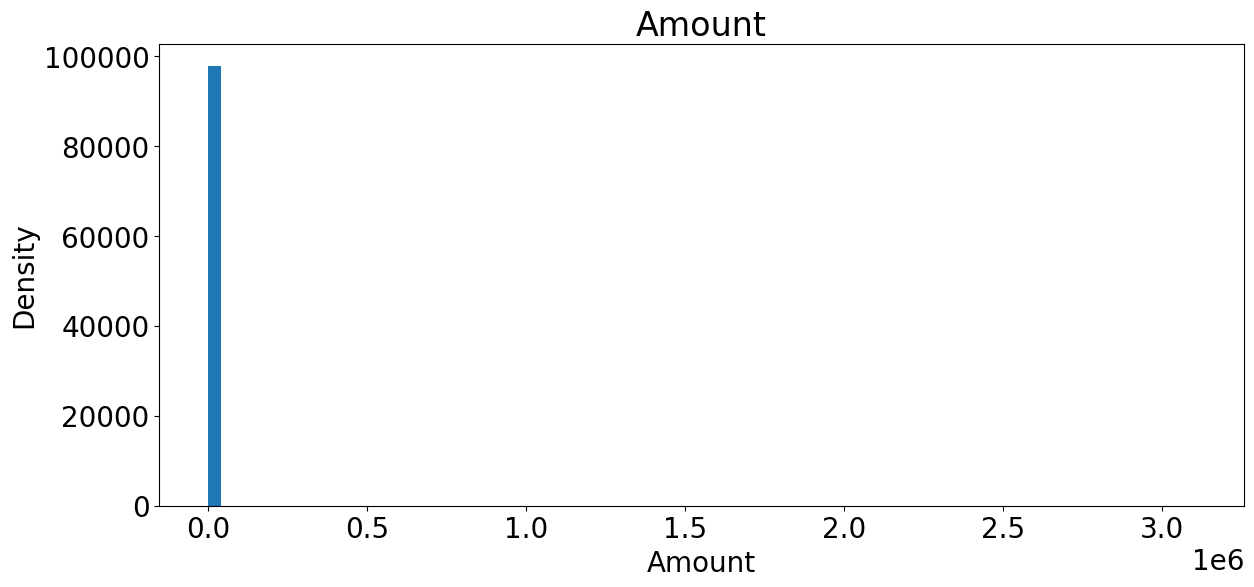

In [15]:
# plot numerics distributions if desired
plt.rcParams.update({'figure.figsize':(14,6)})
plt.rcParams.update({'font.size':20})
for col in numerics:
    plt.hist(data[col],bins=80)
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.title(col)
    plt.show()


/Users/pin/miniconda3/envs/py3k/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


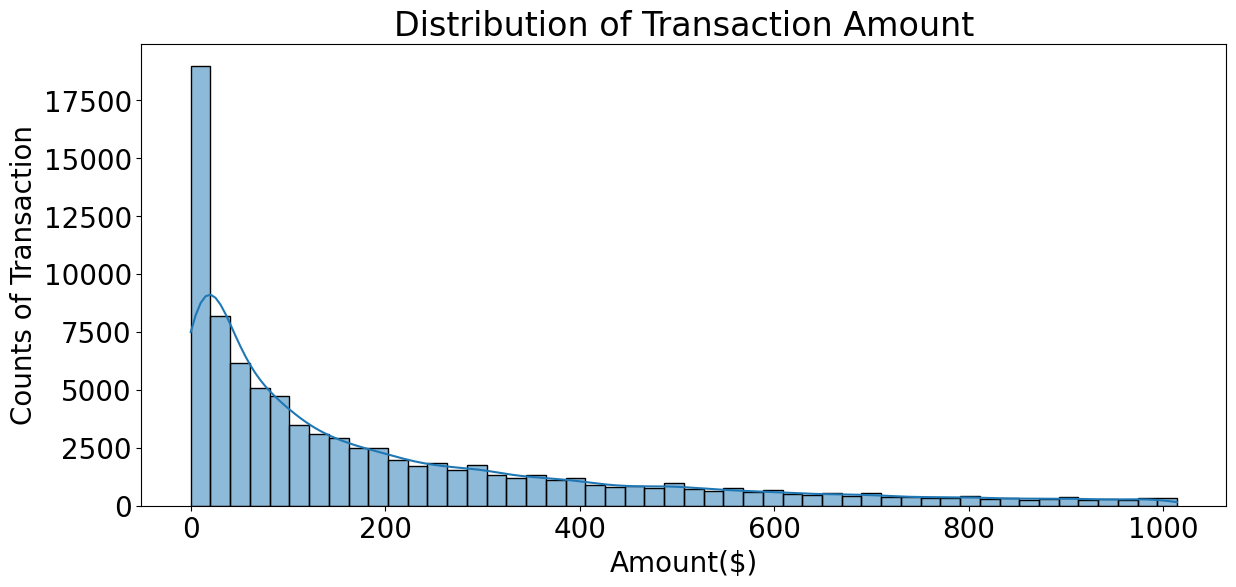

In [16]:
import seaborn as sns

Q1 = data["Amount"].quantile(0.25)
Q3 = data["Amount"].quantile(0.75)
IQR = Q3-Q1

lower_b = Q1-1.5*IQR
upper_b = Q3+1.5*IQR

data_c = data[(data['Amount'] >= lower_b) & (data['Amount'] <= upper_b)]

data_c.head()

plt.rcParams.update({'figure.figsize':(14,6)})
plt.rcParams.update({'font.size':20})

sns.histplot(data_c["Amount"], bins=50, kde=True, edgecolor='k')
#plt.hist(data_c["Amount"], bins=50, edgecolor='k')
plt.xlabel("Amount($)")
plt.ylabel("Counts of Transaction")
plt.title("Distribution of Transaction Amount")
plt.show()

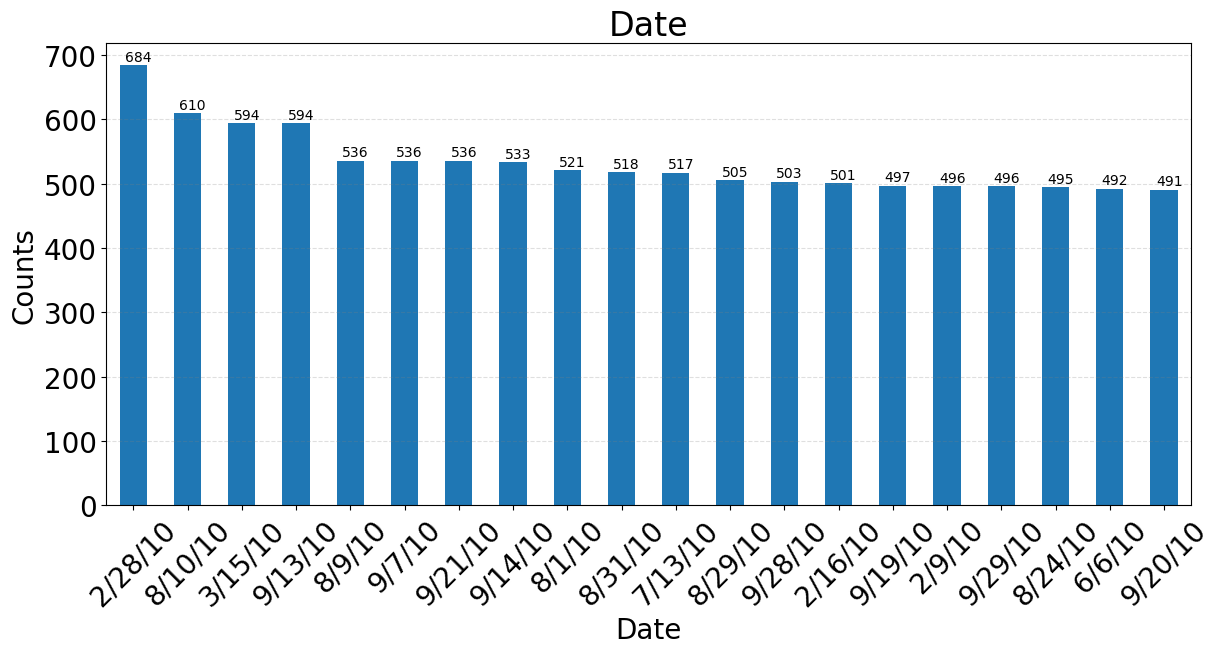

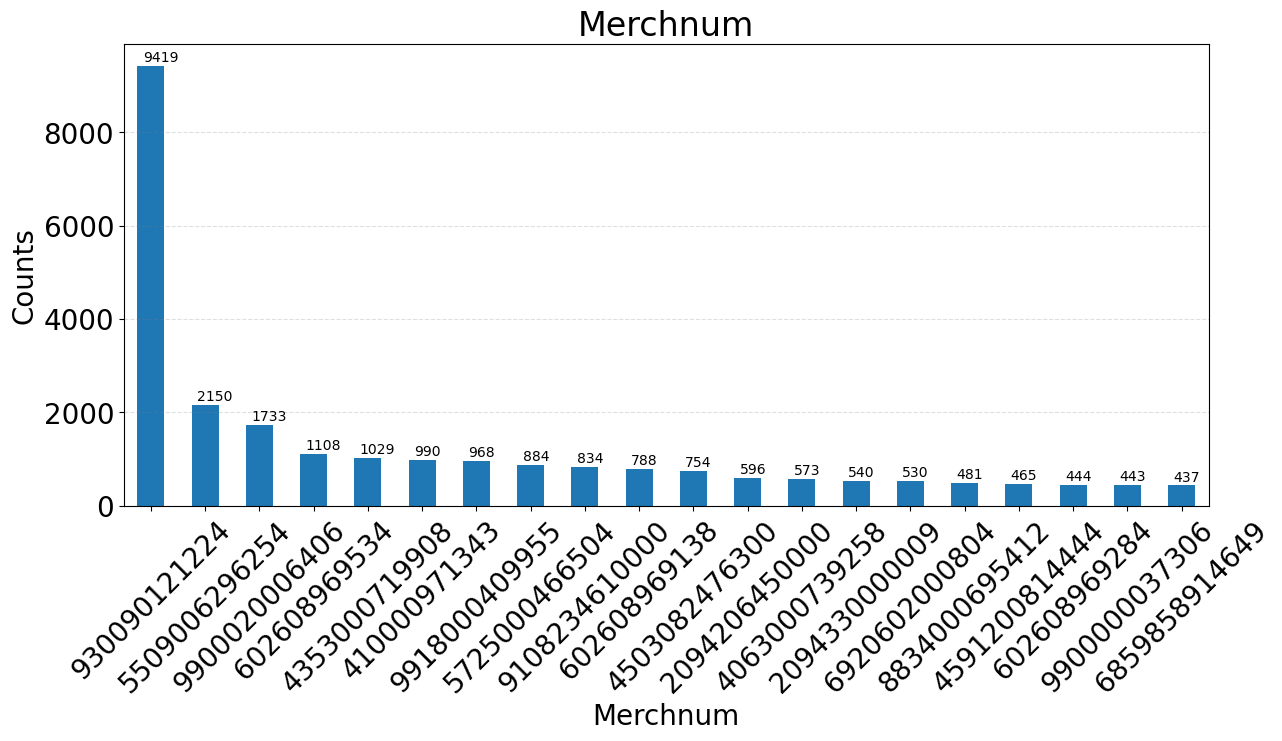

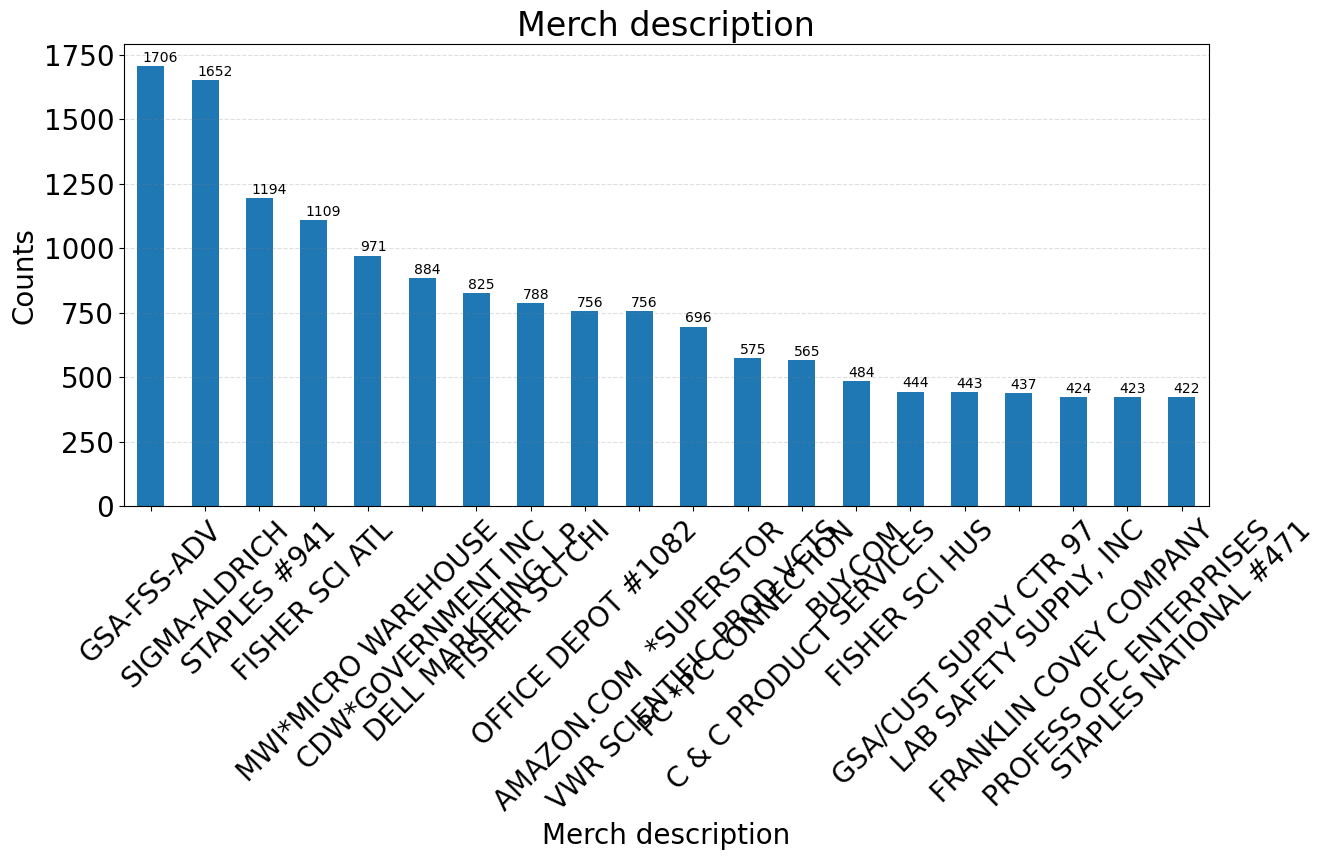

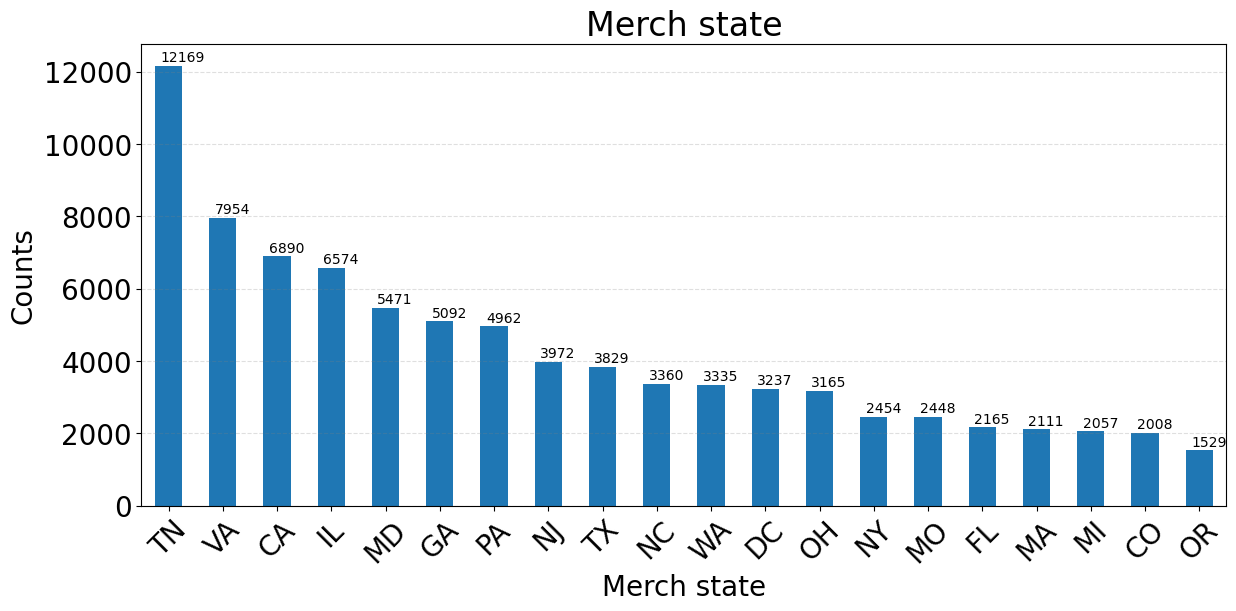

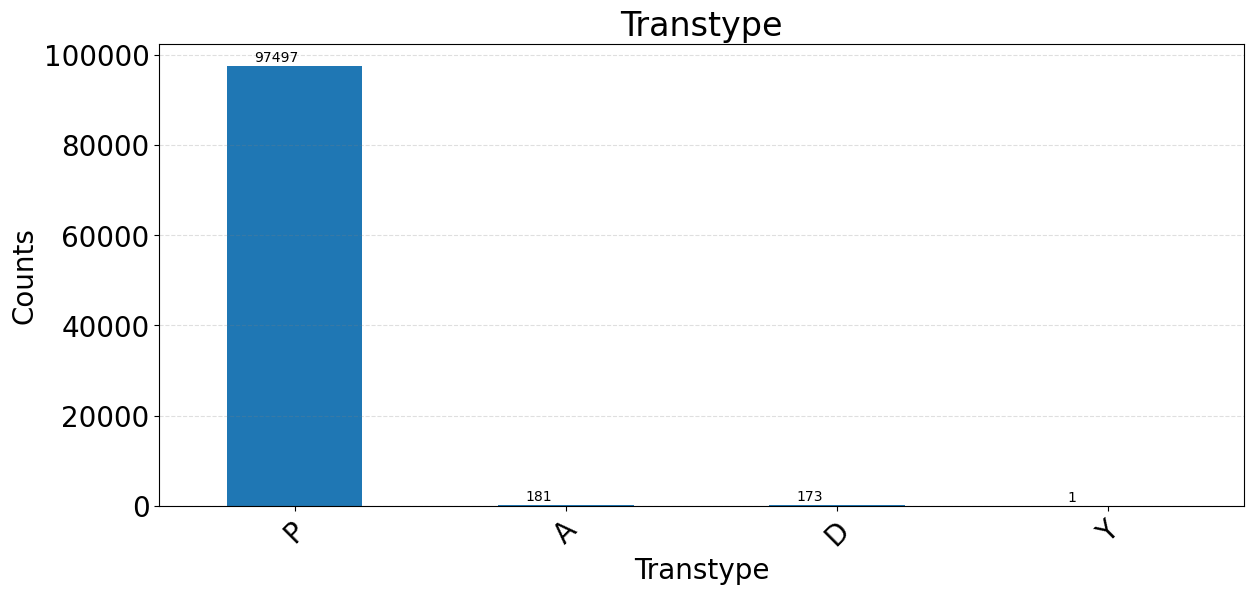

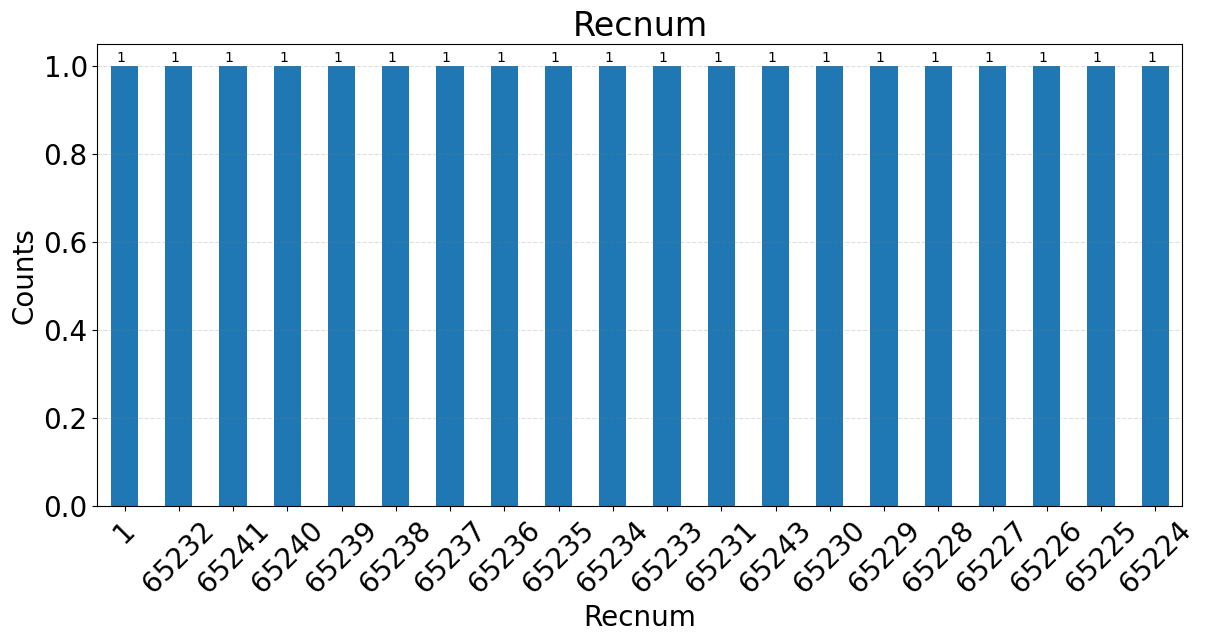

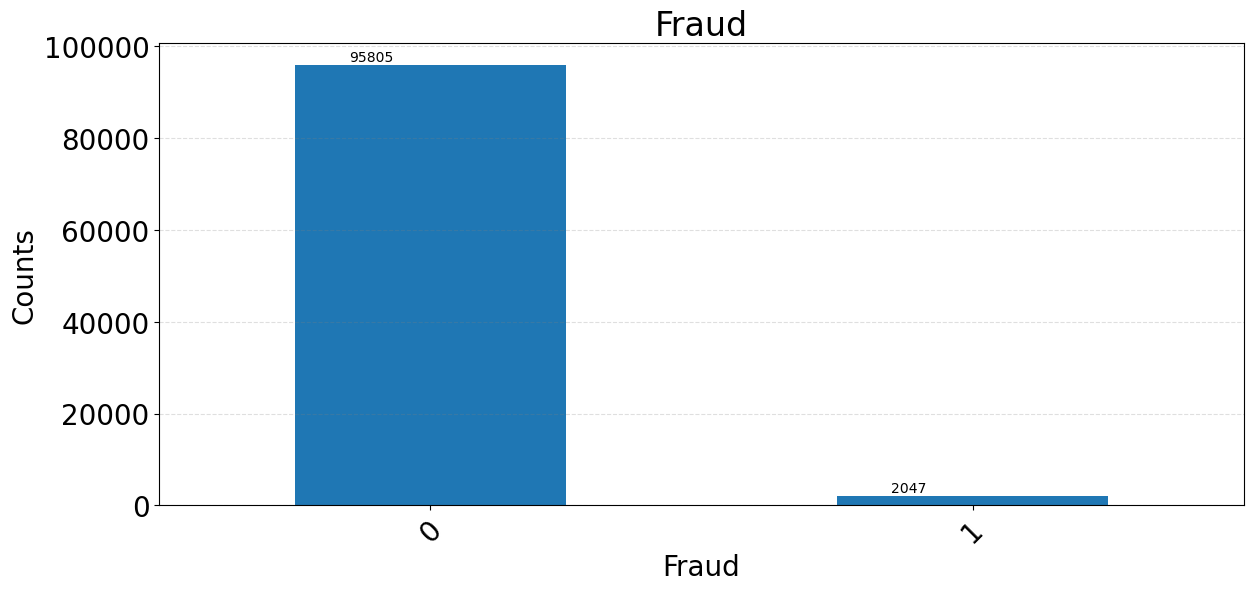

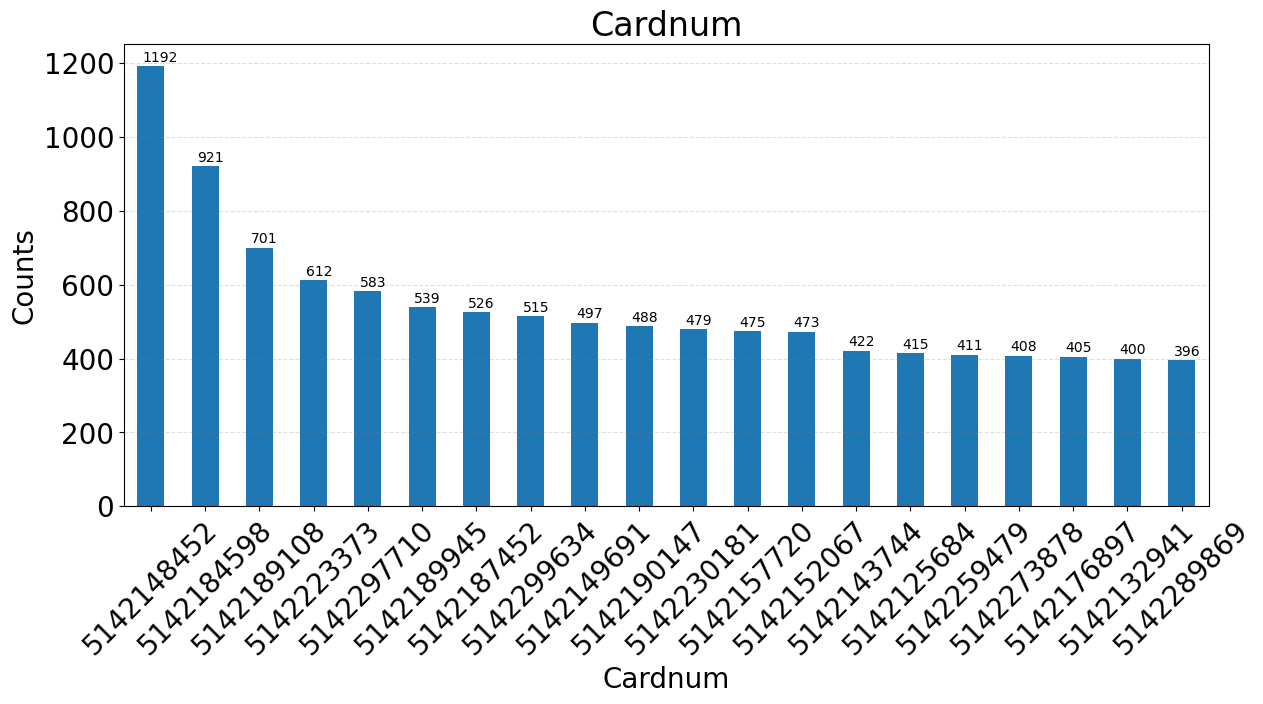

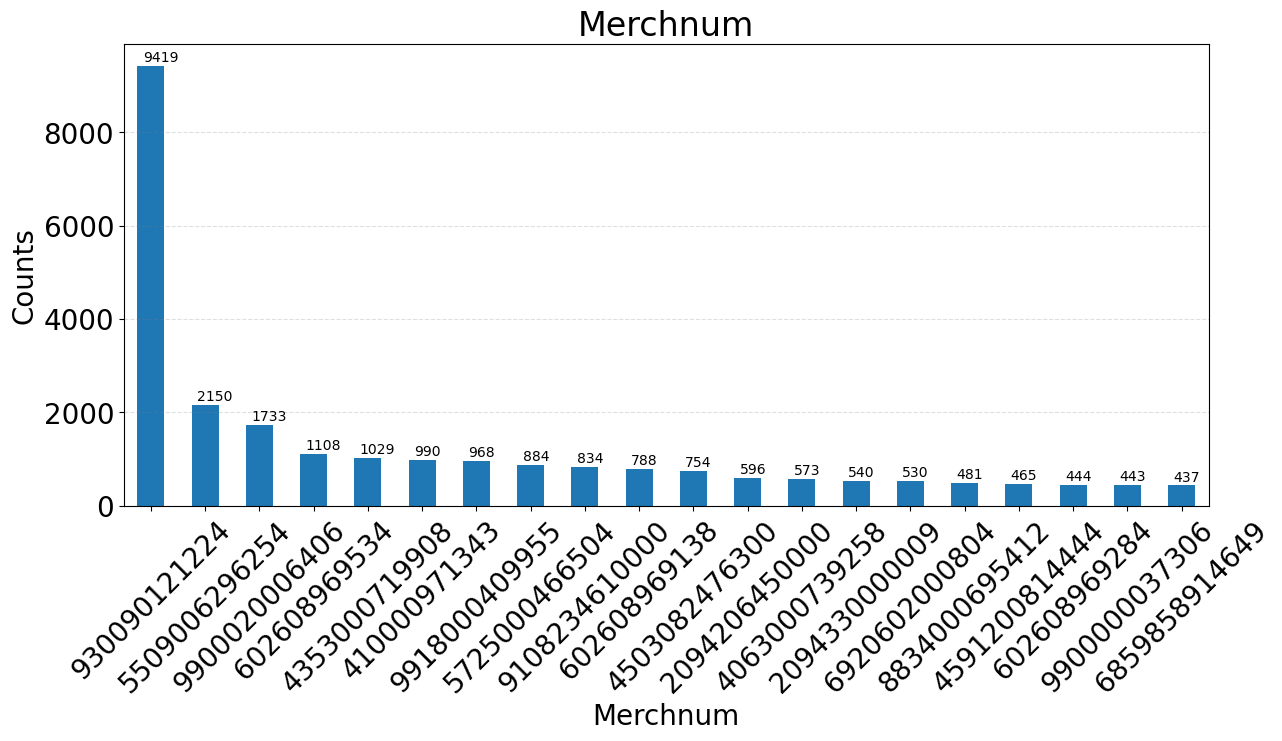

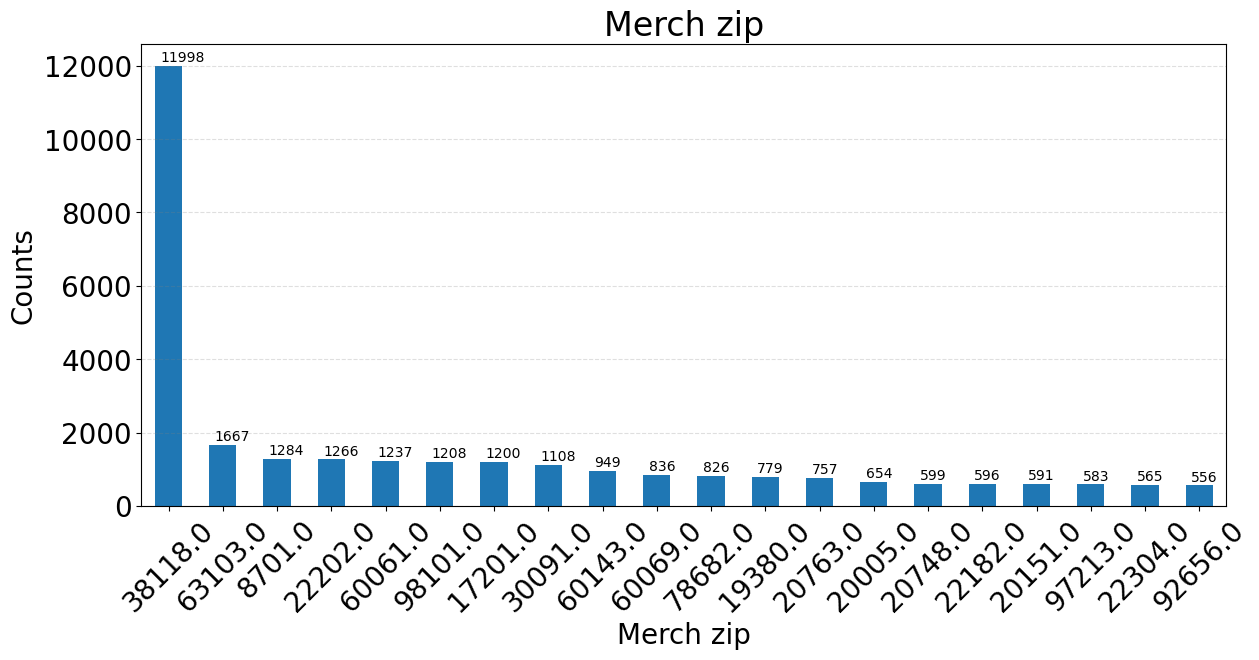

In [16]:
# plot categorical histograms if desired
for col in categoricals:
    counts = data[col].value_counts().head(20)
    ax = counts.plot(kind='bar')
    plt.xticks(rotation=45)
    for i, v in enumerate(counts):
        ax.text(i - 0.15, v + counts.max()*0.01, str(v), color='black', fontsize=10)

    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Counts')
    ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
    plt.show()

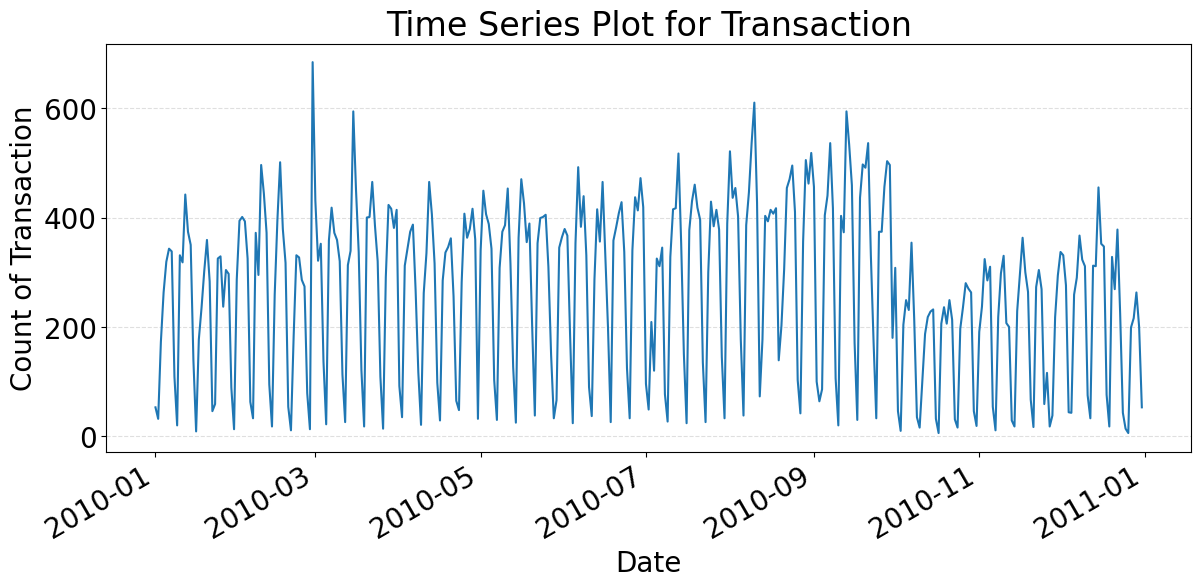

In [48]:
import seaborn as sns
import pandas as pd

# Example data (as above)
# Ensure that the 'date' column is a datetime object
data['Date'] = pd.to_datetime(data['Date'])

counts = data['Date'].value_counts()
ax = counts.plot(kind='line')
# Create the time series plot
#sns.lineplot(x='Date', y='counts', data=data, marker='o')

# Add titles and labels
plt.title("Time Series Plot for Transaction")
plt.xlabel("Date")
plt.ylabel('Count of Transaction')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
plt.savefig('test5.png', bbox_inches='tight')
plt.show()


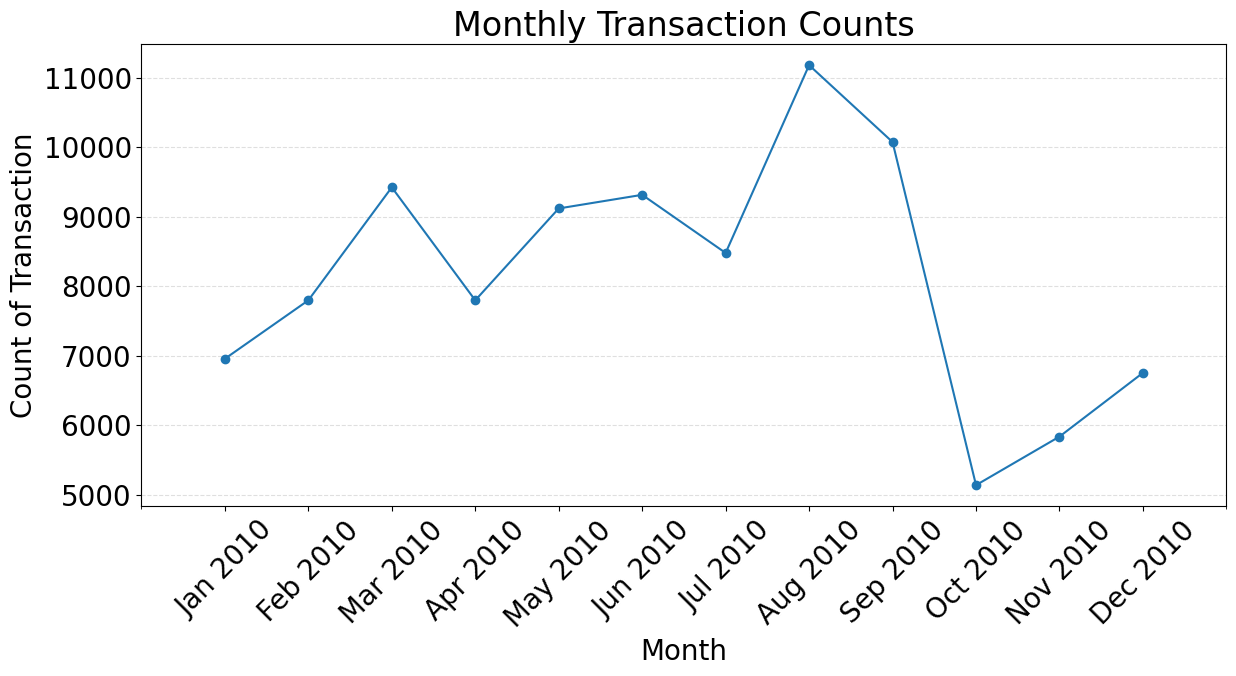

In [49]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Example data (assuming you have a 'Date' column in your dataset)
# Ensure that the 'Date' column is a datetime object
data['Date'] = pd.to_datetime(data['Date'])

# Resample the data by month and count the transactions
monthly_counts = data.resample('M', on='Date').size()

# Create a complete range of months
all_months = pd.date_range(start=monthly_counts.index.min(), 
                           end=monthly_counts.index.max(), 
                           freq='M')

# Reindex to ensure all months are present
monthly_counts = monthly_counts.reindex(all_months, fill_value=0)

# Plot the resampled data
plt.figure(figsize=(14, 6))
ax = monthly_counts.plot(kind='line', marker='o')

# Add titles and labels
plt.title("Monthly Transaction Counts")
plt.xlabel("Month")
plt.ylabel("Count of Transaction")

# Add more space before January and after December
padding = pd.DateOffset(months=1)
ax.set_xlim(all_months.min() - padding, all_months.max() + padding)

# Format the x-axis to show each month
ax.set_xticks(all_months)
ax.set_xticklabels([date.strftime('%b %Y') for date in all_months], rotation=45)

# Add grid and show plot
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
plt.savefig('test6.png', bbox_inches='tight')
plt.show()

In [46]:
counts

Merchnum
930090121224     9419
5509006296254    2150
9900020006406    1733
602608969534     1108
4353000719908    1029
410000971343      990
9918000409955     968
5725000466504     884
9108234610000     834
602608969138      788
4503082476300     754
2094206450000     596
4063000739258     573
2094330000009     540
6920602000804     530
8834000695412     481
4591200814444     465
602608969284      444
9900000037306     443
6859858914649     437
Name: count, dtype: int64

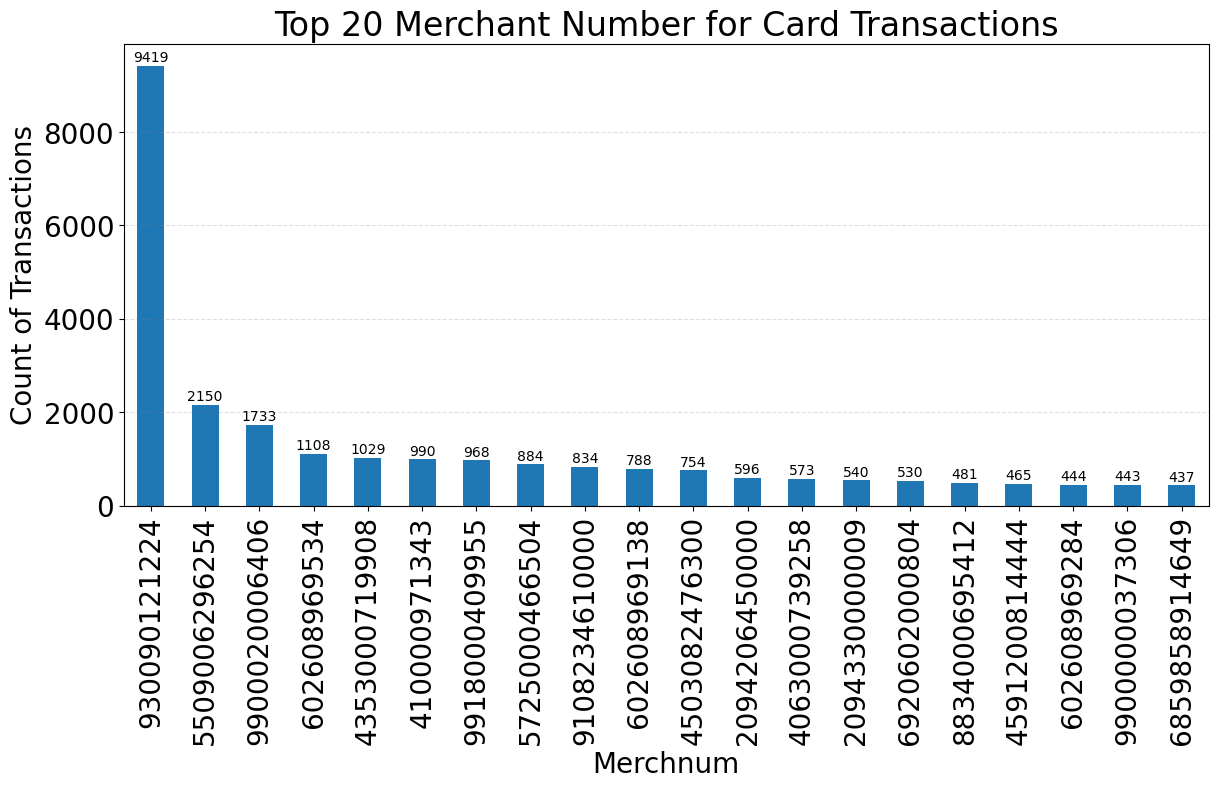

In [50]:
counts = data['Merchnum'].value_counts().head(20)
ax = counts.plot(kind='bar')
plt.xticks(rotation=90)
for i, p in enumerate(counts):
    ax.text(i, p + counts.max()*0.01, str(p), color='black', ha='center', fontsize=10)

# Add titles and labels
plt.title("Top 20 Merchant Number for Card Transactions")
plt.xlabel("Merchnum")
plt.ylabel('Count of Transactions')
plt.savefig('test.png', bbox_inches='tight')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
plt.show()


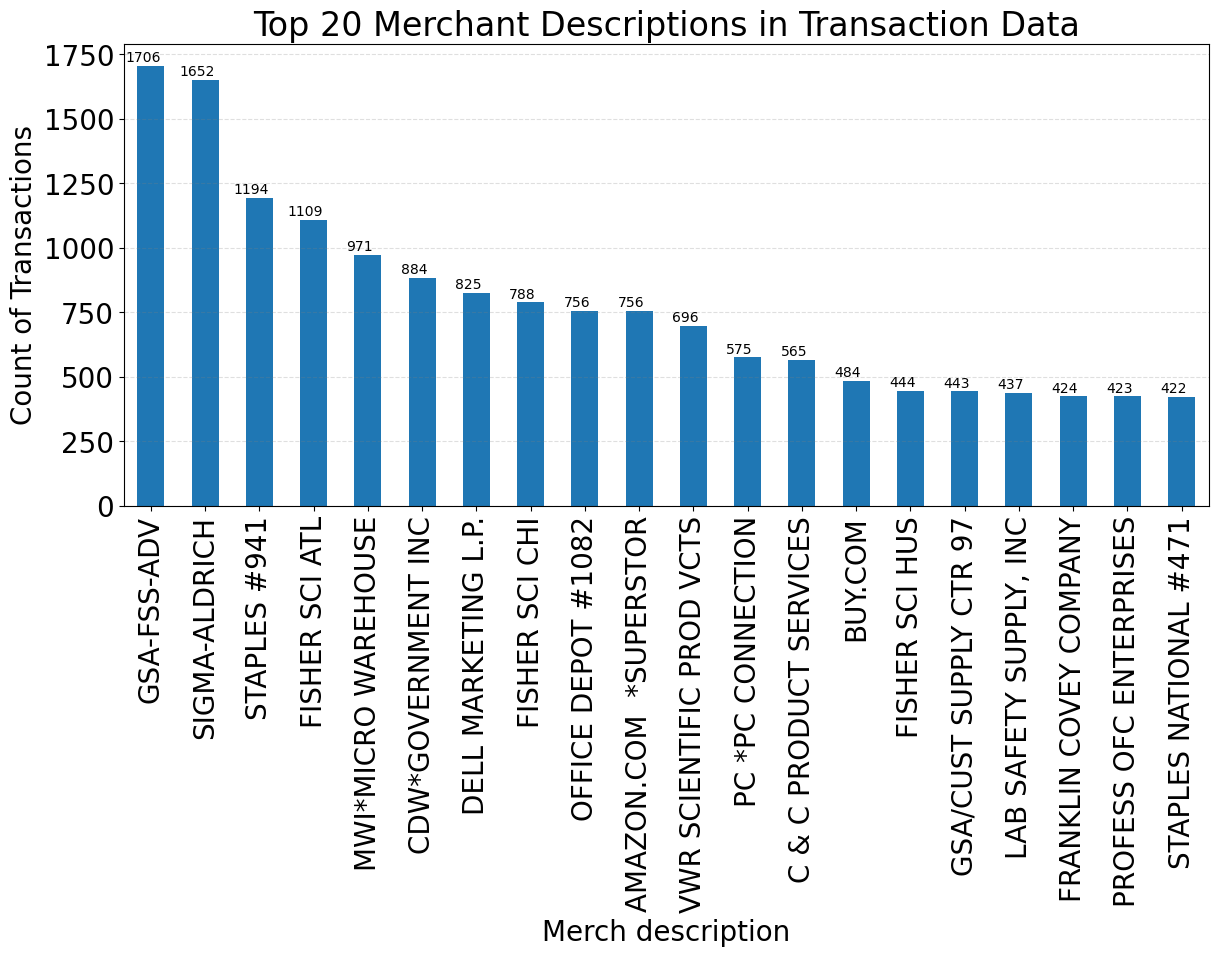

In [38]:
counts = data['Merch description'].value_counts().head(20)
ax = counts.plot(kind='bar')
for i, v in enumerate(counts):
    ax.text(i - 0.15, v + counts.max()*0.01, str(v), color='black', ha='center', fontsize=10)

plt.title('Top 20 Merchant Descriptions in Transaction Data')
plt.xlabel('Merch description')
plt.ylabel('Count of Transactions')
plt.xticks(rotation=90)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
plt.savefig('test.png', bbox_inches='tight')
plt.show()

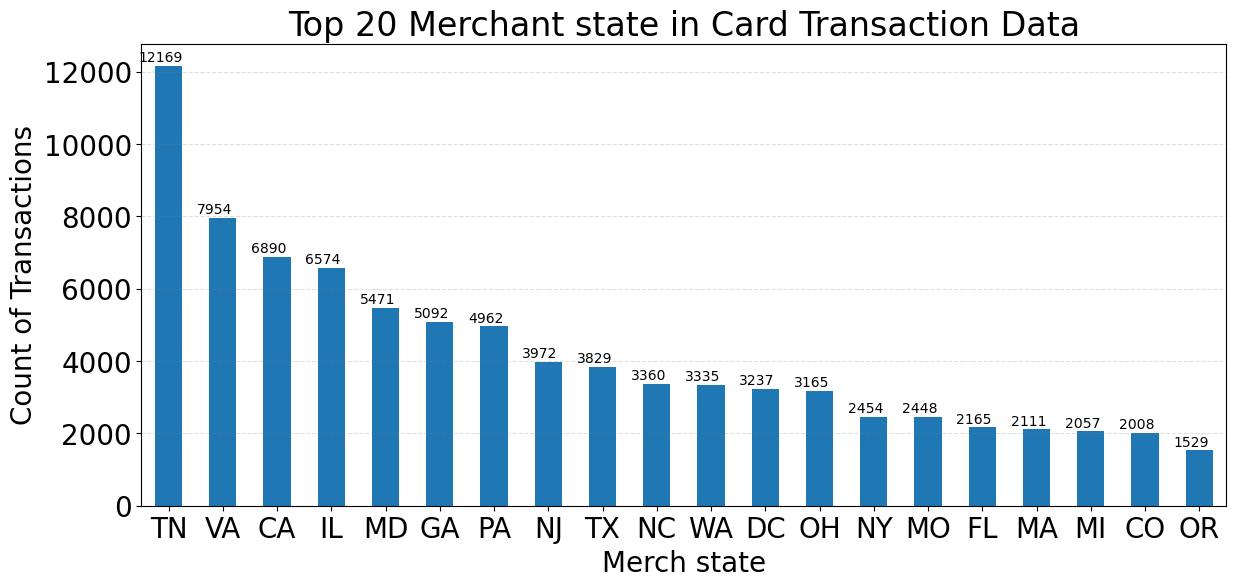

In [39]:
counts = data['Merch state'].value_counts().head(20)
ax = counts.plot(kind='bar')
for i, v in enumerate(counts):
    ax.text(i - 0.15, v + counts.max()*0.01, str(v), color='black', ha='center', fontsize=10)

plt.title('Top 20 Merchant state in Card Transaction Data')
plt.xticks(rotation=0)
plt.xlabel('Merch state')
plt.ylabel('Count of Transactions')
plt.xticks(rotation=0)
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
plt.savefig('test.png', bbox_inches='tight')
plt.show()

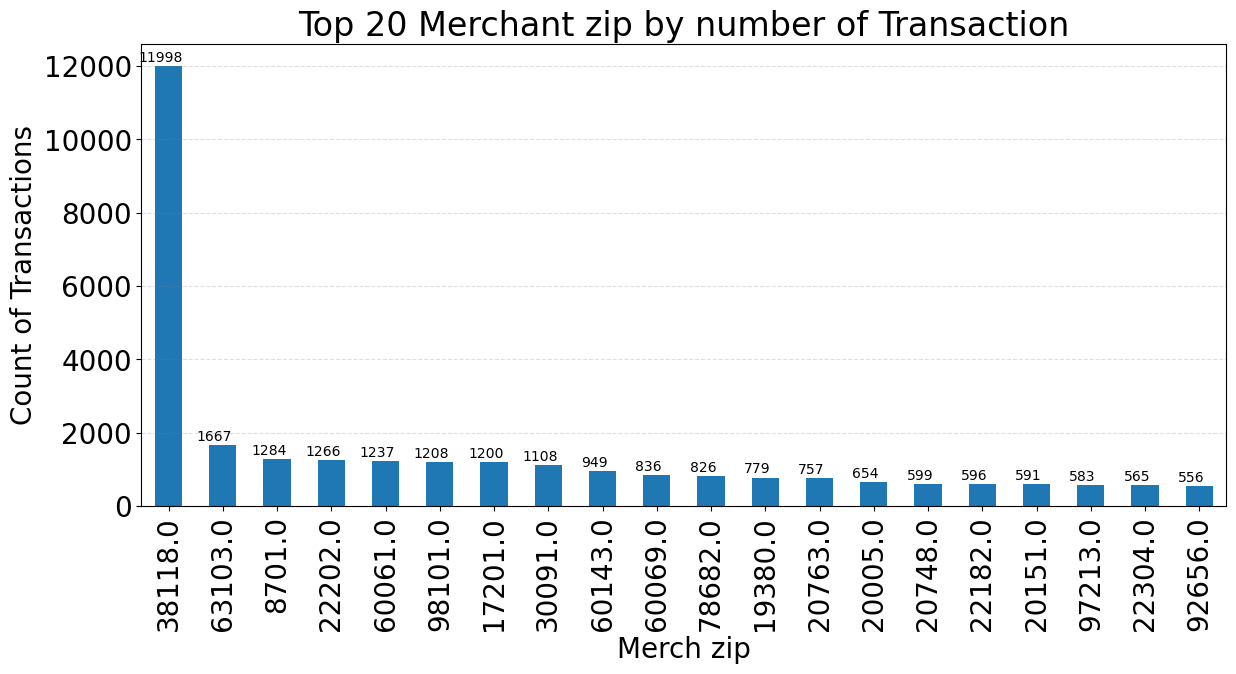

In [47]:

counts = data['Merch zip'].value_counts().head(20)
ax = counts.plot(kind='bar')
for i, v in enumerate(counts):
    ax.text(i - 0.15, v + counts.max()*0.01, str(v), color='black', ha='center', fontsize=10)

plt.title('Top 20 Merchant zip by number of Transaction')
plt.xlabel('Merch zip')
plt.ylabel('Count of Transactions')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
plt.savefig('test1.png', bbox_inches='tight')
plt.show()

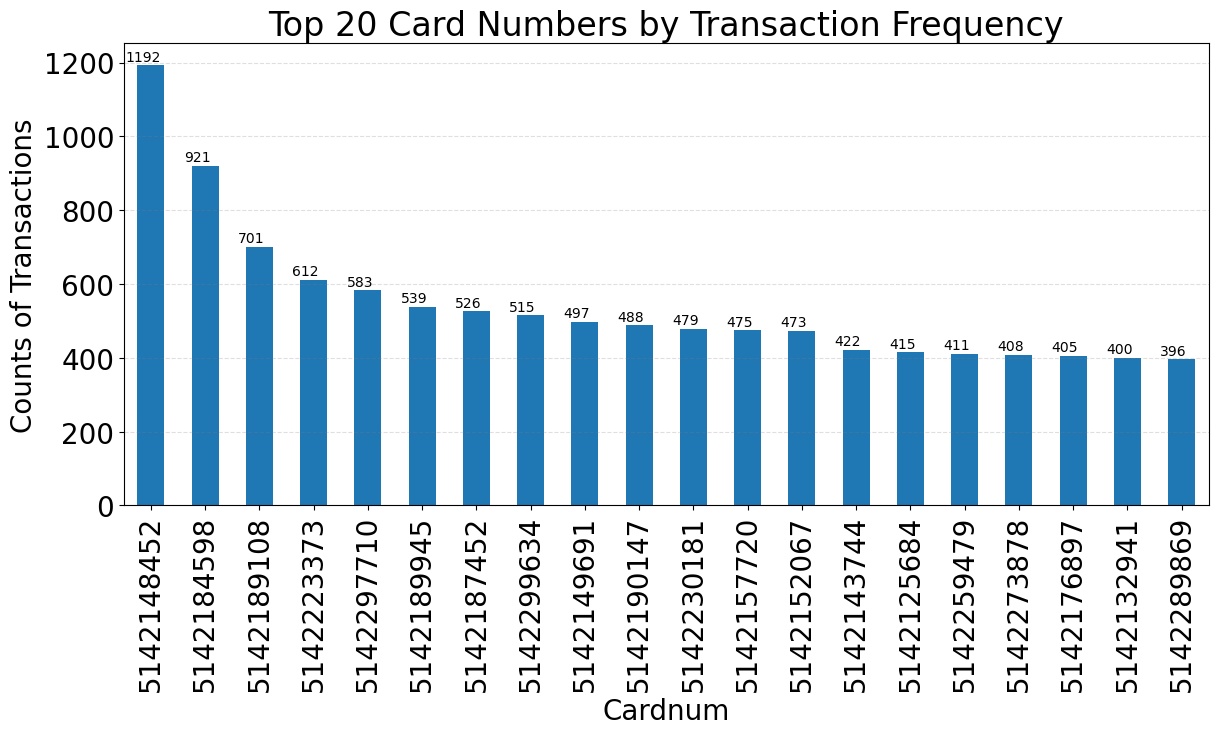

In [44]:

counts = data['Cardnum'].value_counts().head(20)
ax = counts.plot(kind='bar')
for i, v in enumerate(counts):
    ax.text(i - 0.15, v + counts.max()*0.01, str(v), color='black', ha='center', fontsize=10)

plt.title('Top 20 Card Numbers by Transaction Frequency')
plt.xlabel('Cardnum')
plt.ylabel('Counts of Transactions')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
plt.savefig('test3.png', bbox_inches='tight')
plt.show()

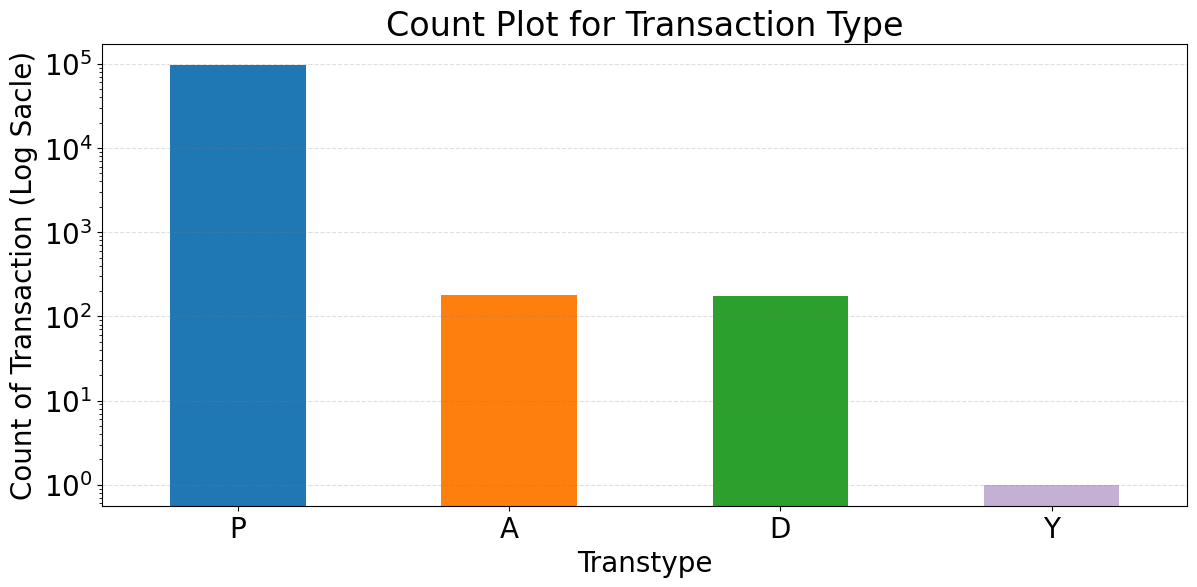

In [46]:
counts = data['Transtype'].value_counts().head(20)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#c5b0d5']
ax = counts.plot(kind='bar', color = colors)
#for i, v in enumerate(counts):
   #ax.text(i - 0.15, v + 7, str(v), color='black', ha='center', fontsize=10)

plt.yscale('log')
plt.title('Count Plot for Transaction Type')
plt.xlabel('Transtype')
plt.xticks(rotation=0)
plt.ylabel('Count of Transaction (Log Sacle)')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
plt.savefig('test2.png', bbox_inches='tight')
plt.show()

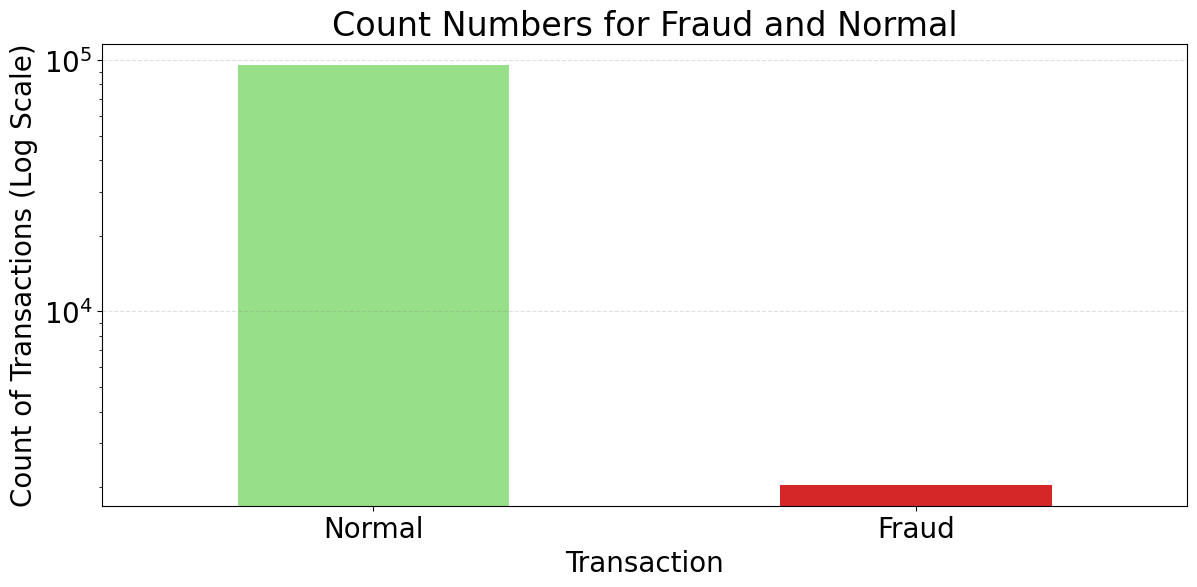

In [45]:
counts = data['Fraud'].value_counts().head()
colors = ['#98df8a', '#d62728']
ax = counts.plot(kind='bar', color=colors)
#for i, v in enumerate(counts):
 #   ax.text(i - 0.15, v + counts.max()*0.01, str(v), color='black', fontsize=10)

new_label = ['Normal', 'Fraud']
plt.yscale('log')
plt.title('Count Numbers for Fraud and Normal')
plt.xlabel('Transaction')
ax.set_xticklabels(new_label) 
plt.xticks(rotation=0)
plt.ylabel('Count of Transactions (Log Scale)')
ax.grid(True, axis='y', linestyle='--', which='major', color='grey', alpha=.25)
plt.savefig('test4.png', bbox_inches='tight')
plt.show()

## The cell below is for supervised problem with a dependent variable y. It looks at the univariate relationship between x and y.

overall response rate is:  0.02091934758615051
97852 different values for Recnum
1645 different values for Cardnum
365 different values for Date
13091 different values for Merchnum
13126 different values for Merch description
227 different values for Merch state
4567 different values for Merch zip


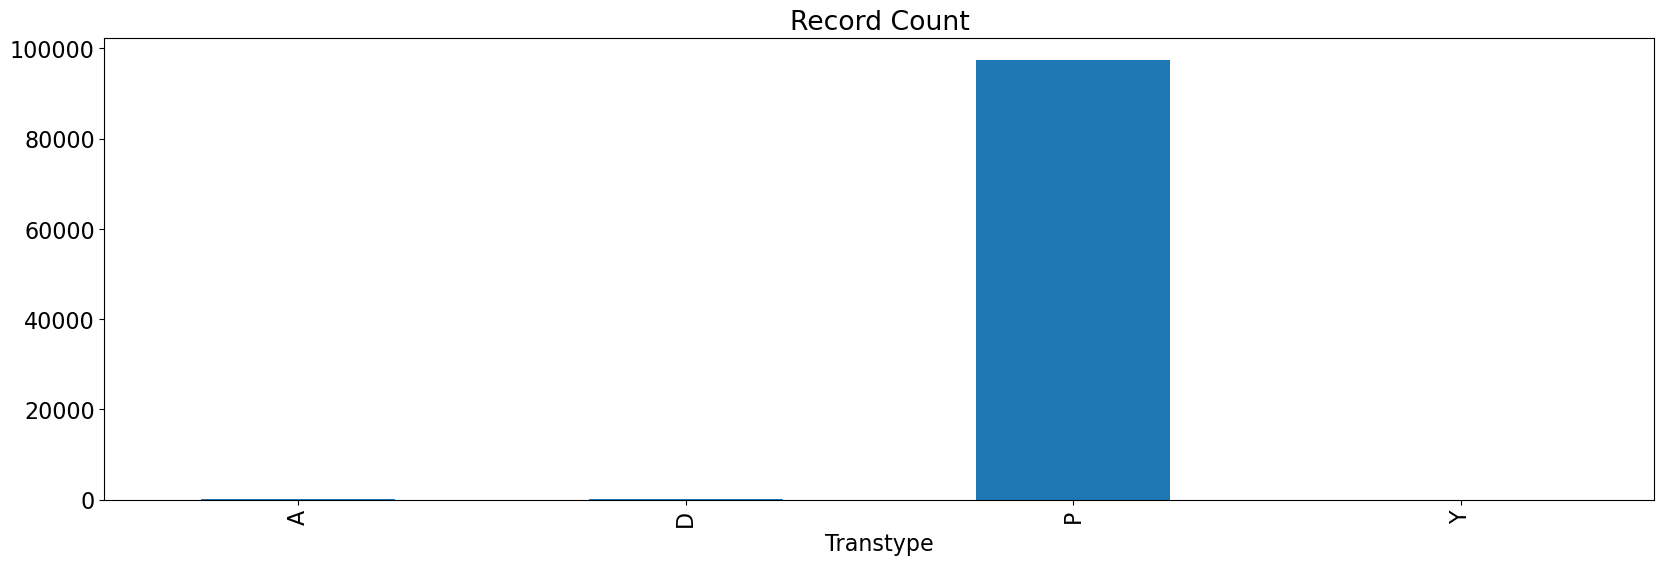

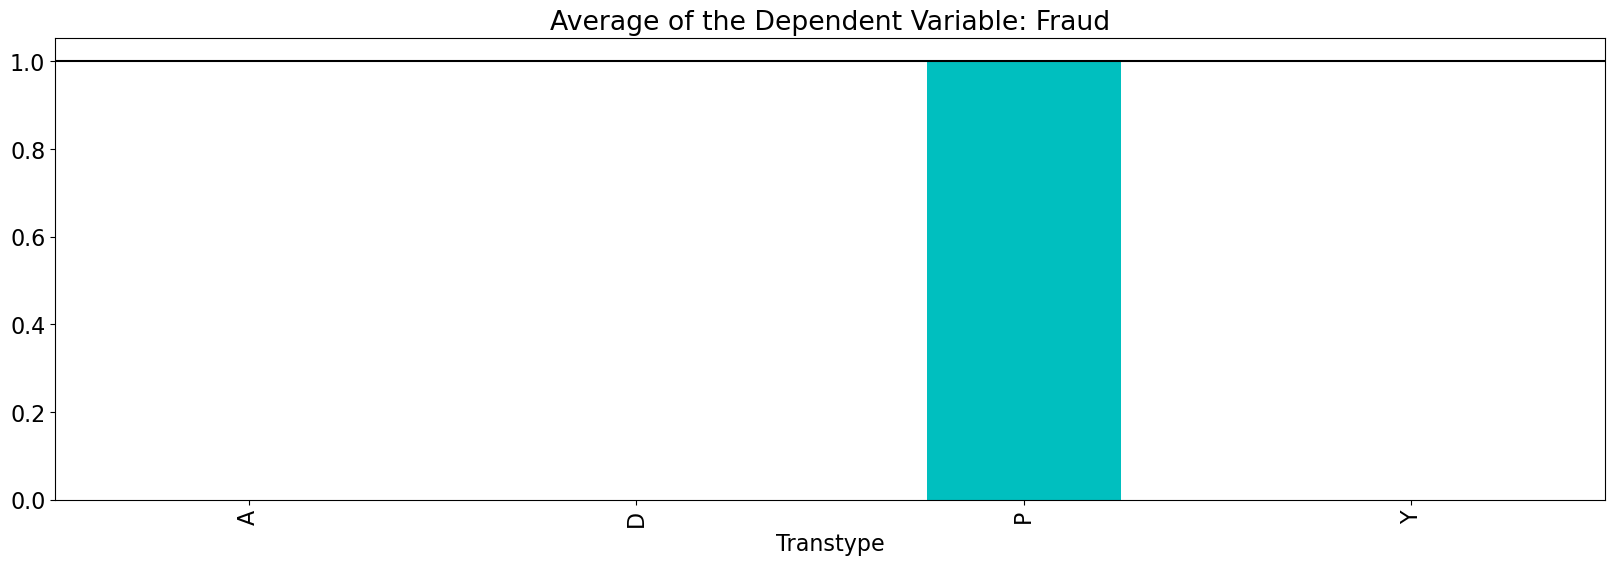

35331 different values for Amount


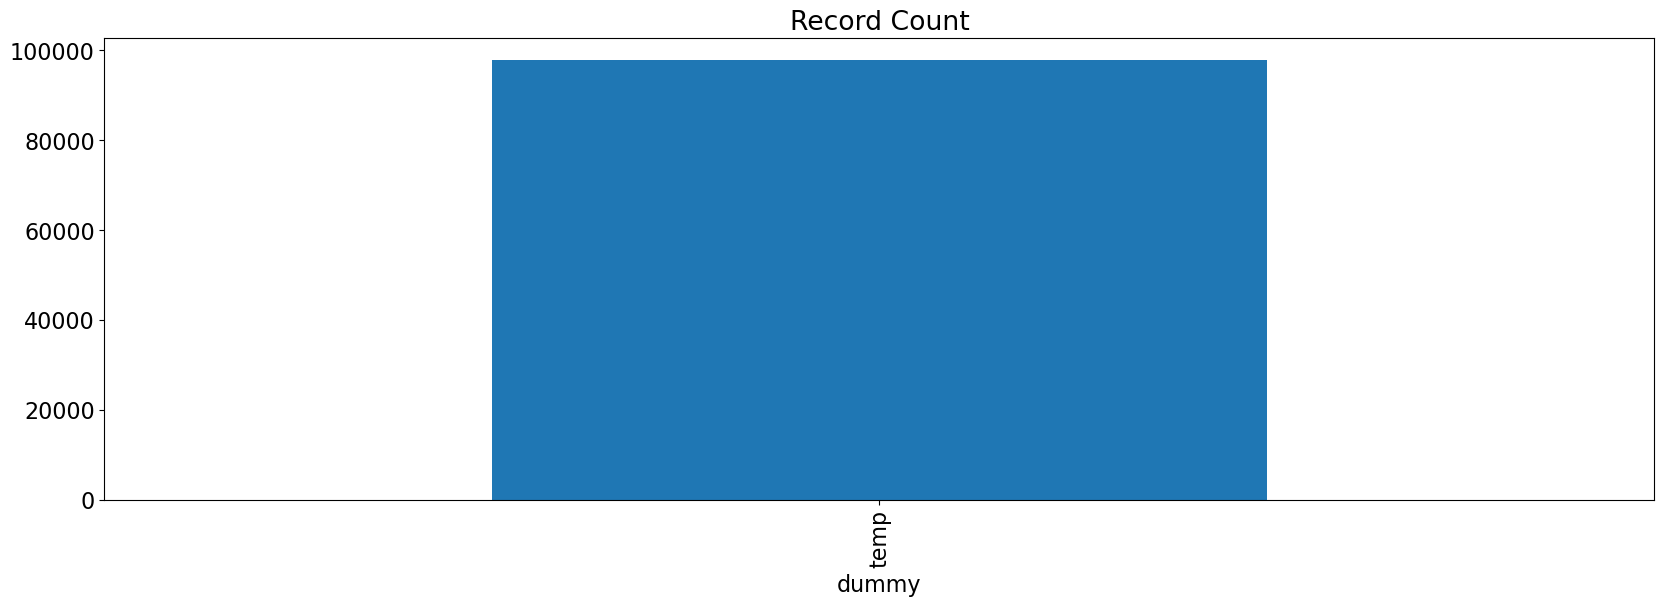

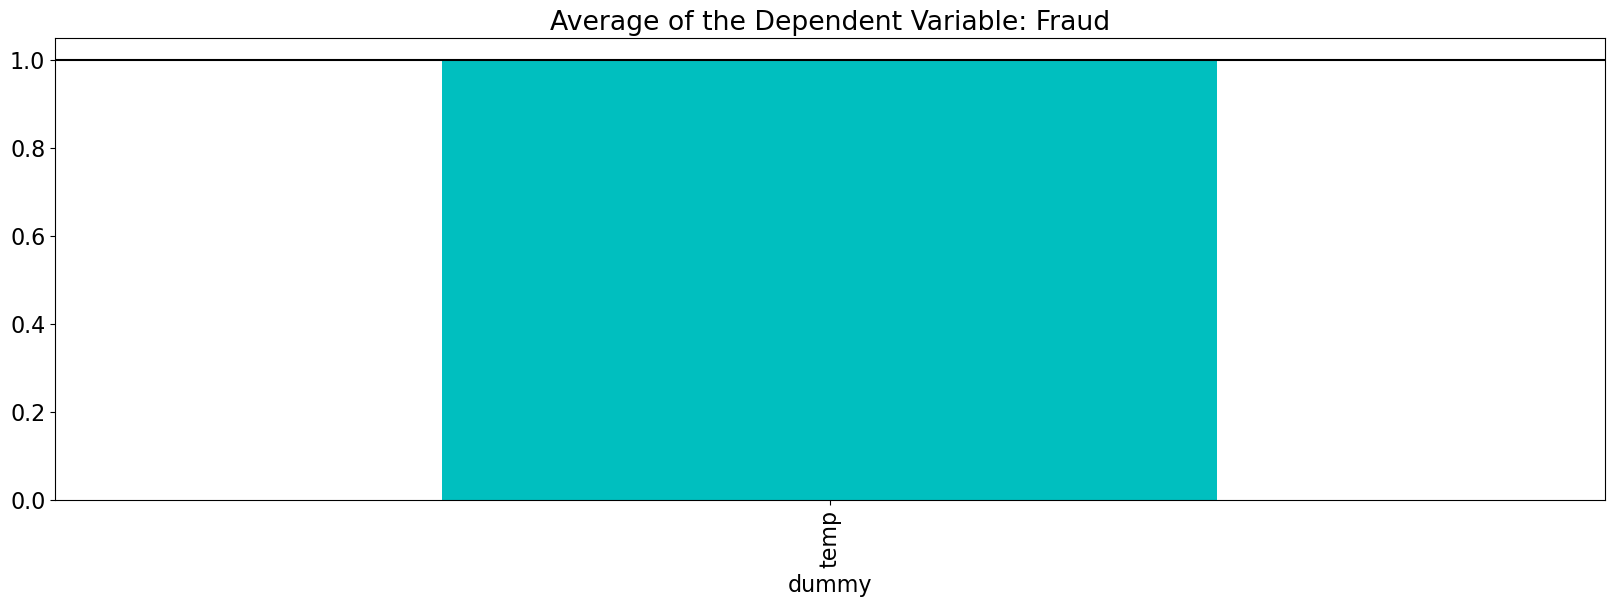

In [24]:
dep_var = 'Fraud'

# sometimes need to convert the dependent variable to a number:
data[dep_var].replace('no',0,inplace=True)
data[dep_var].replace('yes',1,inplace=True)

rate = data[dep_var].mean()

print('overall response rate is: ', rate)
# Plot field distributions and compare with average of the dependent variable y (horizontal line)
plt.rcParams["figure.figsize"] = [20,6]
plt.rcParams.update({'font.size': 16})
plot_cols=data.columns.tolist()
plot_cols.remove(dep_var)
for col in plot_cols:
    num = data[col].nunique()
    if num > 100:
        print(num,"different values for",col)
    else:
        plt.title('Record Count')
        plt.xlabel(col)
        data[col].value_counts().sort_index().plot(kind='bar')
        temp = data.groupby(col)[dep_var].mean() / rate
        plt.show()
        plt.xlabel(col)
        str = 'Average of the Dependent Variable: '+dep_var
        plt.title(str)
        plt.axhline(1,color='black')
        temp.plot(kind='bar',color='c')
        plt.show()

In [26]:
print('duration: ', dt.datetime.now() - start_time)

duration:  0:00:03.133374
